## Compute the Tanimoto similarity coefficient among the monomers of the top polymers for polarizability, optical bandgap, and solvation energy

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit import DataStructs
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statistics import mean


[15:50:08] Enabling RDKit 2019.09.3 jupyter extensions
RDKit WARNING: [15:50:08] Enabling RDKit 2019.09.3 jupyter extensions


In [2]:
SMALL_SIZE = 8
MEDIUM_SIZE = 10
BIGGER_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title
plt.rcParams['legend.title_fontsize'] = 'x-large' # fontsize of legend title

sns.set(font_scale=1.5)
sns.set_style('whitegrid')

In [3]:
def tanimoto_calc(smi1, smi2):
    mol1 = Chem.MolFromSmiles(smi1)
    mol2 = Chem.MolFromSmiles(smi2)
    fp1 = AllChem.GetMorganFingerprintAsBitVect(mol1, 3, nBits=2048)
    fp2 = AllChem.GetMorganFingerprintAsBitVect(mol2, 3, nBits=2048)
    s = round(DataStructs.TanimotoSimilarity(fp1,fp2),3)
    return s

def find_unique_monomers(df_top100):
    unique_mon = []

    monomer_pairs = df_top100['polymer'].values.tolist()
    for x in range(len(monomer_pairs)):
        mon1 = int(monomer_pairs[x].split(',')[0].split('[')[-1])
        mon2 = int(monomer_pairs[x].split()[1].split(']')[0])

        if mon1 not in unique_mon:
            unique_mon.append(mon1)
        if mon2 not in unique_mon:
            unique_mon.append(mon2)

    return unique_mon

In [4]:
# imports all monomer SMILES into DataFrame
df_smiles = pd.read_csv('monomer_SMILES_PCA.csv')
ranked_polar = pd.read_csv('/ihome/ghutchison/dch45/ga_methods/hexamer_pool/data_files/ranked_polar.csv')
ranked_polar = ranked_polar.iloc[:100, :]
polar_mons = find_unique_monomers(ranked_polar)

ranked_optbg = pd.read_csv('/ihome/ghutchison/dch45/ga_methods/hexamer_pool/data_files/ranked_opt_bg.csv')
ranked_optbg = ranked_optbg.iloc[:100, :]
optbg_mons = find_unique_monomers(ranked_optbg)

ranked_solv = pd.read_csv('/ihome/ghutchison/dch45/ga_methods/hexamer_pool/data_files/ranked_solv_eng.csv')
ranked_solv = ranked_solv.iloc[:100, :]
solv_mons = find_unique_monomers(ranked_solv)


### Polarizability

In [5]:
df_smiles.iloc[0][1]
polar_mons.sort()

tanimoto_coefs_polar = []

mon1 = 0
while mon1 < len(polar_mons):
    mon1_combos_tanimoto = []
    smiles_mon1 = 'C' + df_smiles.iloc[polar_mons[mon1]][1] + 'C'
    for x in range(len(polar_mons)):
        smiles_mon2 = 'C' + df_smiles.iloc[polar_mons[x]][1] + 'C'
        tanimoto = tanimoto_calc(smiles_mon1, smiles_mon2)
        mon1_combos_tanimoto.append(tanimoto)
    tanimoto_coefs_polar.append(mon1_combos_tanimoto)
    mon1 +=1

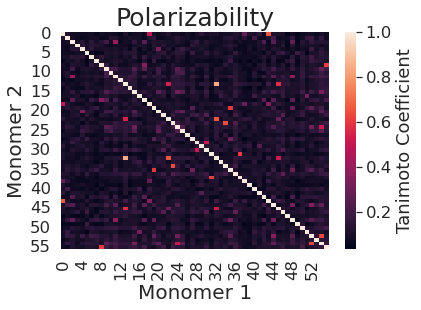

In [7]:
fig, ax = plt.subplots()

ax = sns.heatmap(tanimoto_coefs_polar, cbar_kws={'label': 'Tanimoto Coefficient'})
ax.set_title('Polarizability', fontsize=25)
plt.xlabel('Monomer 1', fontsize=20)
plt.ylabel('Monomer 2', fontsize=20)


plt.savefig('tanimoto_heatmap_polar.png', dpi=600)
plt.savefig('tanimoto_heatmap_polar.pdf', dpi=600)

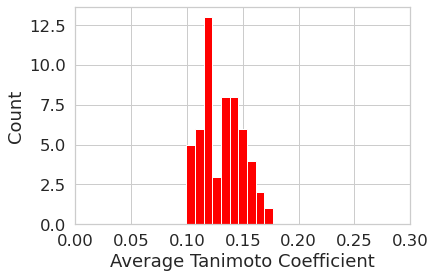

In [20]:
averages_polar = []
for x in range(len(tanimoto_coefs_polar)):
    averages_polar.append(mean(tanimoto_coefs_polar[x]))

fig, ax = plt.subplots()
n, bins, patches = plt.hist(averages_polar, 10, facecolor='red' )
plt.xlim(0, 0.3)
plt.xlabel('Average Tanimoto Coefficient', fontsize=18)
plt.ylabel('Count', fontsize=18)

plt.savefig('tanimoto_hist_polar.png', dpi=600)
plt.savefig('tanimoto_hist_polar.pdf', dpi=600)


### Optical bandgap

In [11]:
df_smiles.iloc[0][1]
optbg_mons.sort()

tanimoto_coef_optbg = []

mon1 = 0
while mon1 < len(optbg_mons):
    mon1_combos_tanimoto = []
    smiles_mon1 = 'C' + df_smiles.iloc[optbg_mons[mon1]][1] + 'C'
    for x in range(len(optbg_mons)):
        smiles_mon2 = 'C' + df_smiles.iloc[optbg_mons[x]][1] + 'C'
        tanimoto = tanimoto_calc(smiles_mon1, smiles_mon2)
        mon1_combos_tanimoto.append(tanimoto)
    tanimoto_coef_optbg.append(mon1_combos_tanimoto)
    mon1 +=1

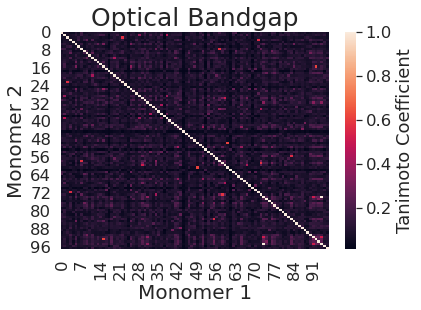

In [12]:
fig, ax = plt.subplots()

ax = sns.heatmap(tanimoto_coef_optbg, cbar_kws={'label': 'Tanimoto Coefficient'})
ax.set_title('Optical Bandgap', fontsize=25)
plt.xlabel('Monomer 1', fontsize=20)
plt.ylabel('Monomer 2', fontsize=20)


plt.savefig('tanimoto_heatmap_optbg.png', dpi=600)
plt.savefig('tanimoto_heatmap_optbg.pdf', dpi=600)

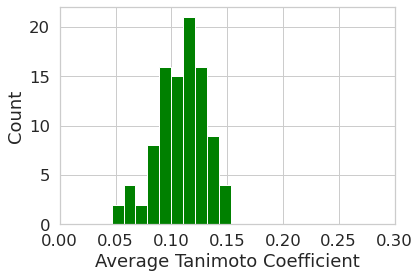

In [19]:
averages_optbg = []
for x in range(len(tanimoto_coef_optbg)):
    averages_optbg.append(mean(tanimoto_coef_optbg[x]))

fig, ax = plt.subplots()
n, bins, patches = plt.hist(averages_optbg, 10, facecolor='green' )
plt.xlim(0, 0.3)
plt.xlabel('Average Tanimoto Coefficient', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.savefig('tanimoto_hist_optbg.png', dpi=600)
plt.savefig('tanimoto_hist_optbg.pdf', dpi=600)

### Solvation Energy

In [15]:
df_smiles.iloc[0][1]
solv_mons.sort()

tanimoto_coefs_solv = []

mon1 = 0
while mon1 < len(solv_mons):
    mon1_combos_tanimoto = []
    smiles_mon1 = 'C' + df_smiles.iloc[solv_mons[mon1]][1] + 'C'
    for x in range(len(solv_mons)):
        smiles_mon2 = 'C' + df_smiles.iloc[solv_mons[x]][1] + 'C'
        tanimoto = tanimoto_calc(smiles_mon1, smiles_mon2)
        mon1_combos_tanimoto.append(tanimoto)
    tanimoto_coefs_solv.append(mon1_combos_tanimoto)
    mon1 +=1

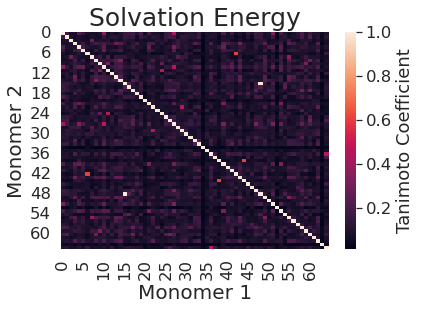

In [16]:
fig, ax = plt.subplots()

ax = sns.heatmap(tanimoto_coefs_solv, cbar_kws={'label': 'Tanimoto Coefficient'})
ax.set_title('Solvation Energy', fontsize=25)
plt.xlabel('Monomer 1', fontsize=20)
plt.ylabel('Monomer 2', fontsize=20)


plt.savefig('tanimoto_heatmap_solv_eng.png', dpi=600)
plt.savefig('tanimoto_heatmap_solv_eng.pdf', dpi=600)

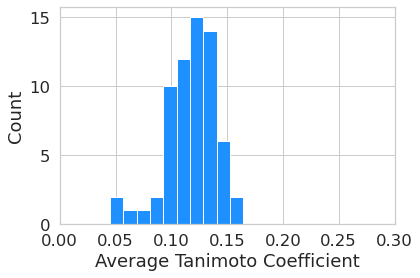

In [18]:
averages_solv = []
for x in range(len(tanimoto_coefs_solv)):
    averages_solv.append(mean(tanimoto_coefs_solv[x]))

fig, ax = plt.subplots()
n, bins, patches = plt.hist(averages_solv, 10, facecolor='dodgerblue')
plt.xlim(0, 0.3)
plt.xlabel('Average Tanimoto Coefficient', fontsize=18)
plt.ylabel('Count', fontsize=18)
plt.savefig('tanimoto_hist_solv_eng.png', dpi=600)
plt.savefig('tanimoto_hist_solv_eng.pdf', dpi=600)